# 1. Loading and Exploring the Data

In [252]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from model_lib.fixed_c45 import C45Classifier
import numpy as np

## 1.1 Load the Data

In [253]:
# Load the data
data_train = pd.read_csv('DataMining/input/train.csv')
data_test = pd.read_csv('DataMining/input/test.csv')
# Merge the data
data=pd.concat([data_train,data_test],sort=False)
# Display the first 5 rows
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 1.2 Data Exploration

In [254]:
# Display the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [255]:
# Display the data statistics
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [256]:
# Display the data statistics for the non-numeric columns
data.describe(include=['O'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


# 2. Data Preprocessing

In [257]:
data=data.drop(['Unnamed: 0','id'],axis=1)

In [258]:
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']

## 2.1 Missing Values

In [259]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [260]:
# Fill the missing values in the 'Arrival Delay in Minutes' column with the median value
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22848\3159495229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)


### 2.1.1 Transformation Data

In [261]:
# trans log(value) if value > 0 for 'Arrival Delay in Minutes' and 'Departure Delay in Minutes' columns
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].apply(lambda x: np.log(x) if x > 0 else x)
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].apply(lambda x: np.log(x) if x > 0 else x)

## 2.2 Discretization

In [262]:
# Discretize the numeric columns by frequency
discretizer = KBinsDiscretizer(n_bins=9, encode='ordinal', strategy='uniform')

# Fit and transform the numeric columns
data[numeric_columns] = discretizer.fit_transform(data[numeric_columns])

# Display the first 5 rows to check the discretized data
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,0.0,Personal Travel,Eco Plus,0.0,3,4,3,1,...,5,4,3,4,4,5,5,3.0,3.0,neutral or dissatisfied
1,Male,disloyal Customer,2.0,Business travel,Business,0.0,3,2,3,3,...,1,1,5,3,1,4,1,0.0,2.0,neutral or dissatisfied
2,Female,Loyal Customer,2.0,Business travel,Business,2.0,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,Female,Loyal Customer,2.0,Business travel,Business,0.0,2,5,5,5,...,2,2,5,3,1,4,2,2.0,2.0,neutral or dissatisfied
4,Male,Loyal Customer,6.0,Business travel,Business,0.0,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied


In [263]:
print(len(data[data['Arrival Delay in Minutes']>0]))
print(len(data))

51400
129880


In [264]:
# Check for duplicate rows
print('Duplicated rows: ', data.duplicated().sum())

Duplicated rows:  538


In [265]:
# Drop the duplicate rows
data.drop_duplicates(inplace=True)

## 2.3 Categorical Data

In [266]:
# Display the unique values
data.nunique()

Gender                               2
Customer Type                        2
Age                                  9
Type of Travel                       2
Class                                3
Flight Distance                      9
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
Departure Delay in Minutes           9
Arrival Delay in Minutes             9
satisfaction                         2
dtype: int64

## 2.4 Encoding Categorical Data

In [267]:
# Label encoding
label_encoder = LabelEncoder()
header={
    'Gender': ['Male', 'Female'],
    'Customer Type': ['Loyal Customer', 'disloyal Customer'],
    'Type of Travel': ['Personal Travel', 'Business travel'],
    'Class': ['Eco', 'Eco Plus', 'Business'],
    'satisfaction': ['neutral or dissatisfied', 'satisfied']
}
for key in header:
    data[key] = label_encoder.fit_transform(data[key])
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,0.0,1,2,0.0,3,4,3,1,...,5,4,3,4,4,5,5,3.0,3.0,0
1,1,1,2.0,0,0,0.0,3,2,3,3,...,1,1,5,3,1,4,1,0.0,2.0,0
2,0,0,2.0,0,0,2.0,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,1
3,0,0,2.0,0,0,0.0,2,5,5,5,...,2,2,5,3,1,4,2,2.0,2.0,0
4,1,0,6.0,0,0,0.0,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,1


## 2.5 Feature Scaling


In [268]:
# Standardization except the target column
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])


C:\Users\Admin\AppData\Local\Temp\ipykernel_22848\2642927554.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01473646  1.01473646 -0.98547755 ... -0.98547755  1.01473646
 -0.98547755]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
C:\Users\Admin\AppData\Local\Temp\ipykernel_22848\2642927554.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.47445546  2.10767942 -0.47445546 ... -0.47445546 -0.47445546
 -0.47445546]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
C:\Users\Admin\AppData\Local\Temp\ipykernel_22848\2642927554.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pa

In [269]:
# Display the first 5 rows to check the scaled data
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.014736,-0.474455,-1.842388,1.489948,2.258946,-0.882565,0.205144,0.617251,0.174412,-1.546612,...,1.233394,0.482121,-0.263699,0.314110,0.549358,1.155837,1.305812,1.002156,0.975345,0
1,1.014736,2.107679,-0.712306,-0.671164,-0.959177,-0.882565,0.205144,-0.692392,0.174412,0.018410,...,-1.764397,-1.848196,1.255424,-0.532934,-1.818432,0.306391,-1.737461,-0.691489,0.414550,0
2,-0.985478,-0.474455,-0.712306,-0.671164,-0.959177,0.216997,-0.547394,-0.692392,-0.539089,-0.764101,...,1.233394,0.482121,-0.263699,0.314110,0.549358,0.306391,1.305812,-0.691489,-0.707040,1
3,-0.985478,-0.474455,-0.712306,-0.671164,-0.959177,-0.882565,-0.547394,1.272073,1.601413,1.583432,...,-1.014949,-1.071424,1.255424,-0.532934,-1.818432,0.306391,-0.976643,0.437608,0.414550,0
4,1.014736,-0.474455,1.547858,-0.671164,-0.959177,-0.882565,0.205144,-0.037570,0.174412,0.018410,...,-0.265501,-0.294651,0.495863,0.314110,-0.239906,-0.543055,-0.215825,-0.691489,-0.707040,1


In [270]:
# duplicate data
data.drop_duplicates(inplace=True)

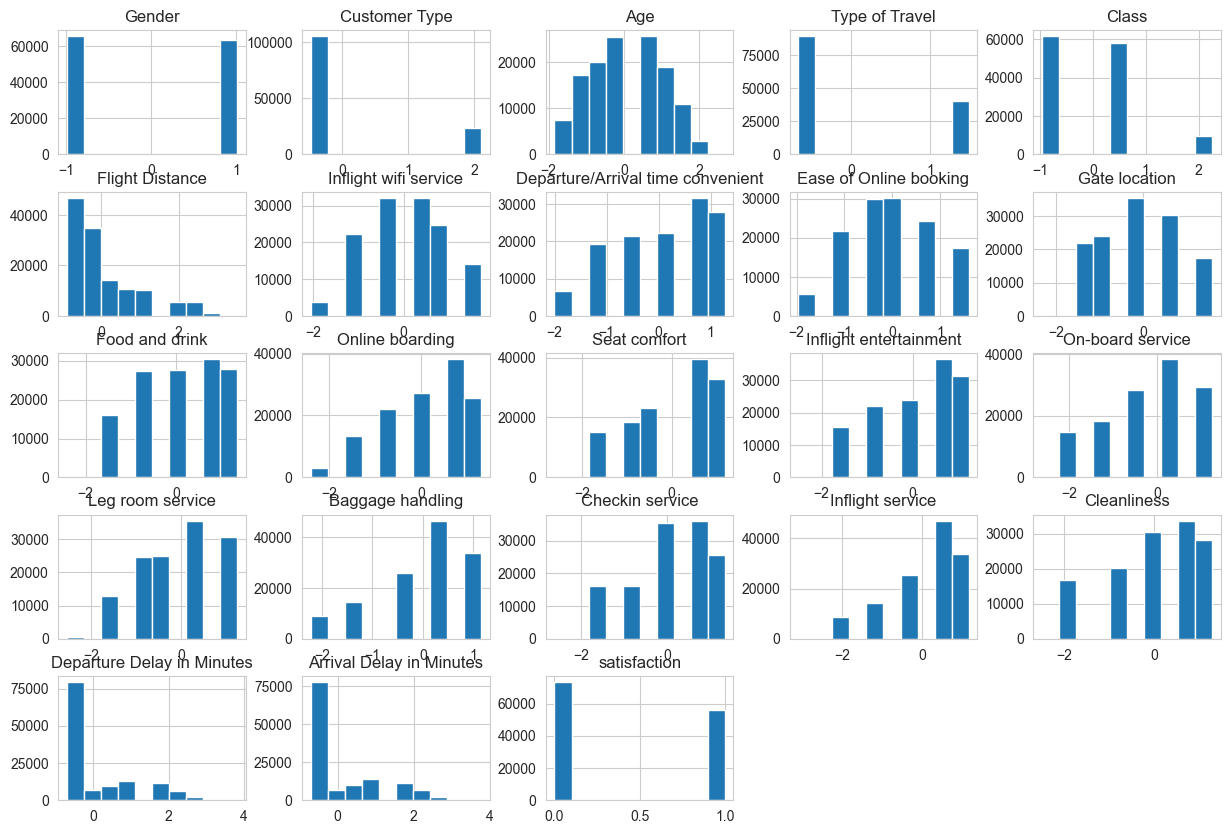

In [271]:
#histogram of numerical columns
data.hist(figsize=(15,10))
plt.show()

In [272]:
# Remove the outliers > 3 standard deviations
data = data[(data[numeric_columns] < 3).all(axis=1)]

## 2.6 Correlation Matrix

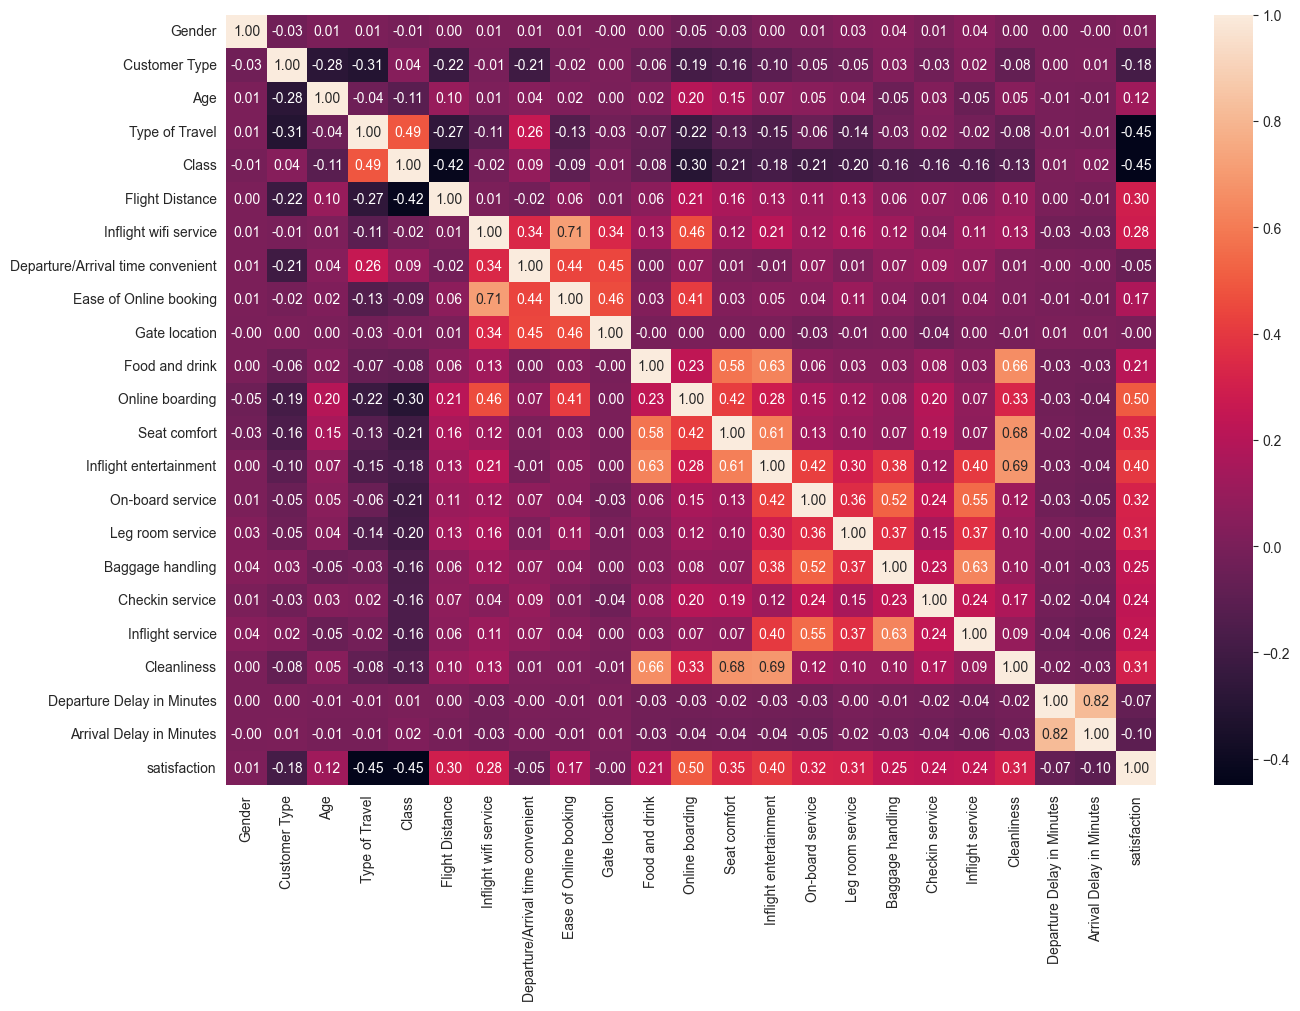

In [273]:
# Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

In [274]:
# Split the data into X and y
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

In [275]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.014736,-0.474455,-1.842388,1.489948,2.258946,-0.882565,0.205144,0.617251,0.174412,-1.546612,...,1.183821,1.233394,0.482121,-0.263699,0.314110,0.549358,1.155837,1.305812,1.002156,0.975345
1,1.014736,2.107679,-0.712306,-0.671164,-0.959177,-0.882565,0.205144,-0.692392,0.174412,0.018410,...,-1.846849,-1.764397,-1.848196,1.255424,-0.532934,-1.818432,0.306391,-1.737461,-0.691489,0.414550
2,-0.985478,-0.474455,-0.712306,-0.671164,-0.959177,0.216997,-0.547394,-0.692392,-0.539089,-0.764101,...,1.183821,1.233394,0.482121,-0.263699,0.314110,0.549358,0.306391,1.305812,-0.691489,-0.707040
3,-0.985478,-0.474455,-0.712306,-0.671164,-0.959177,-0.882565,-0.547394,1.272073,1.601413,1.583432,...,-1.089181,-1.014949,-1.071424,1.255424,-0.532934,-1.818432,0.306391,-0.976643,0.437608,0.414550
4,1.014736,-0.474455,1.547858,-0.671164,-0.959177,-0.882565,0.205144,-0.037570,0.174412,0.018410,...,1.183821,-0.265501,-0.294651,0.495863,0.314110,-0.239906,-0.543055,-0.215825,-0.691489,-0.707040


In [276]:
# Select the features with the correlation greater than |0.1|
threadhold = 0.15
correlation = data.corr()['satisfaction']
selected_features = correlation[(correlation > threadhold) | (correlation < -threadhold)].index
selected_features = selected_features.drop('satisfaction')
X = X[selected_features]

# 3. Model Building

In [277]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [278]:
# Display the shape of the training and testing sets
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (90282, 16)
X_test shape:  (38693, 16)


In [279]:
c_dt=C45Classifier(max_depth=8)
c_dt.fit(X_train, y_train)

{'Depth of tree: 8'}

In [280]:
# Predict the target
y_pred = c_dt.predict(X_test)
y_pred_train = c_dt.predict(X_train)

In [281]:
#Check overfitting
print('Train score: ', c_dt.score(X_train, y_train))
print('Test score: ', c_dt.score(X_test, y_test))

Train score:  0.9605679980505527
Test score:  0.9434006150983382


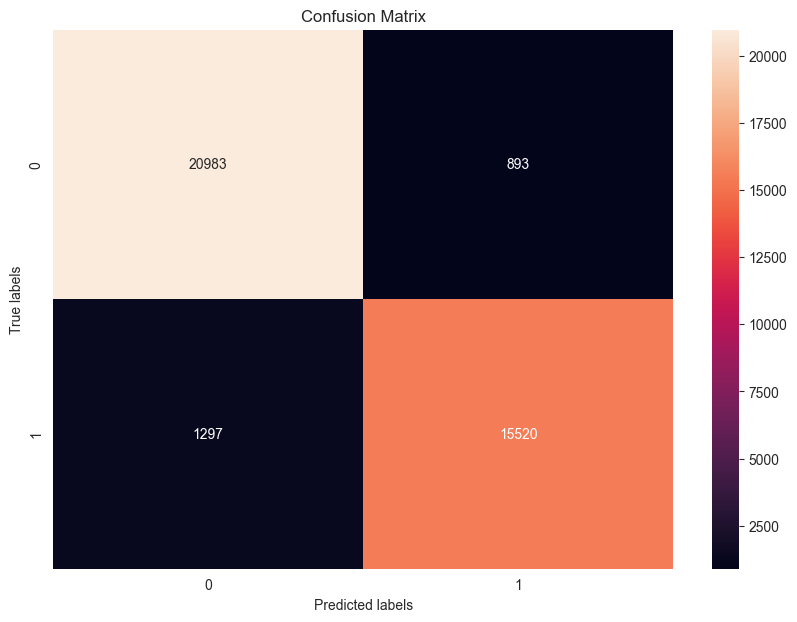

In [282]:
# Display the confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [283]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     21876
           1       0.95      0.92      0.93     16817

    accuracy                           0.94     38693
   macro avg       0.94      0.94      0.94     38693
weighted avg       0.94      0.94      0.94     38693



In [284]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     51324
           1       0.97      0.94      0.95     38958

    accuracy                           0.96     90282
   macro avg       0.96      0.96      0.96     90282
weighted avg       0.96      0.96      0.96     90282



In [285]:
# Accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9434006150983382
